In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sympy as sp


#Funciones utilizadas------------------------------------

#Medir tiempo
start_time = time.time()
end_time = time.time()
execution_time = end_time - start_time
print(f"El tiempo de ejecución fue: {execution_time:.6f} segundos")

El tiempo de ejecución fue: 0.000046 segundos


El objetivo va a ser logra obtener la evolución temporal y el diagrama de fases para el mismo hamiltoniano que hemos estudiado cuánticamente y ver sus semejanzas y diferencias. El hamiltoniano es:
\begin{equation}
H_{0} = -\frac{4 J}{N} (S_{z})^{2}-2hS_{x}-\frac{16K}{N^{3}} (S_{z})^{4}
\end{equation}
Para poder aplicar las ecs de Hamilton, necesitamos que esté en función de las coordenadas generalizadas $q_{i}$ y momentos generalizados $p_{i}$. En este caso, según ha calculado alguien, hay que hacer la sustitución:

\begin{gather}
    S_{z} = \frac{q^{2}+p^{2}}{2} - 1\\
    S_{x} = q \frac{\sqrt{4-q^{2}-p^{2}}}{2}
\end{gather}

Para hacer más visual las curvas de nivel en el espacio de fases rotamos nuestro SDRF 90 grados de manera que $J_{z} \longrightarrow - J_{x}$ y $J_{x} \longrightarrow J_{z}$. Ahora construimos el hamiltoniano en nuestro código y calculamos las derivadas parciales del hamiltoniano que nos permitirán obtener los puntos fijos y posteriormente la evolución temporal:

In [2]:
def S_x(p,q):
    return -((q**2+p**2)/2 - 1)
def S_z(p,q):
    return q*np.sqrt(4-q**2-p**2)/2

def H(N,J,h,K,p,q):
    return -(4*J/N) *(S_z(p,q))**2-2*h*S_x(p,q)-(16*K)/(N**3) * (S_z(p,q))**4

# Definir variables
N, J, h, K, p, q = sp.symbols('N J h K p q')

# Definir s_x y s_z
sx=-((p**2+q**2)/2 - 1)
sz=q*sp.sqrt(4-q**2-p**2)/2

# Definir H(x, y) en términos de g y h
H = -(4*J/N) *(sz)**2-2*h*sx-(16*K)/(N**3) * (sz)**4

# Expandir la expresión para ver cómo queda en términos de x e y
H_expanded = H.expand()

print("H sin expandir en términos de p y q:", H)
print("H en términos de p y q:", H_expanded)

dH_dq = sp.diff(H, q)  # Derivada parcial respecto a x
dH_dp = sp.diff(H, p)  # Derivada parcial respecto a y
print("dH/dq=",sp.simplify(dH_dq))
print("dH/dp=",sp.simplify(dH_dp))



H sin expandir en términos de p y q: -J*q**2*(-p**2 - q**2 + 4)/N - K*q**4*(-p**2 - q**2 + 4)**2/N**3 - 2*h*(-p**2/2 - q**2/2 + 1)
H en términos de p y q: J*p**2*q**2/N + J*q**4/N - 4*J*q**2/N - K*p**4*q**4/N**3 - 2*K*p**2*q**6/N**3 + 8*K*p**2*q**4/N**3 - K*q**8/N**3 + 8*K*q**6/N**3 - 16*K*q**4/N**3 + h*p**2 + h*q**2 - 2*h
dH/dq= 2*q*(J*N**2*(p**2 + 2*q**2 - 4) + 2*K*q**2*(-p**2 - 2*q**2 + 4)*(p**2 + q**2 - 4) + N**3*h)/N**3
dH/dp= 2*p*(J*N**2*q**2 - 2*K*q**4*(p**2 + q**2 - 4) + N**3*h)/N**3


Para encontrar los mínimos del hamiltoniano, puntos donde se situaría el sistema en el estado fundamental, buscamos el lugar geométrico donde se cumpla el sistema de ecuaciones:

\begin{gather}
    \frac{\partial H}{\partial p}=0\\
    \frac{\partial H}{\partial q}=0
\end{gather}
Esto lo hacemos con el hamiltoniano inicial, cuyo estado fundamental es del que vamos a partir en la evolucón temporal tras el quench.

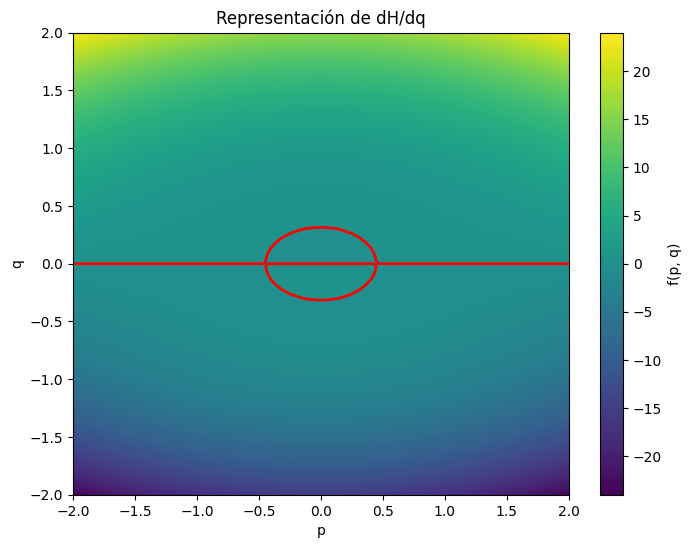

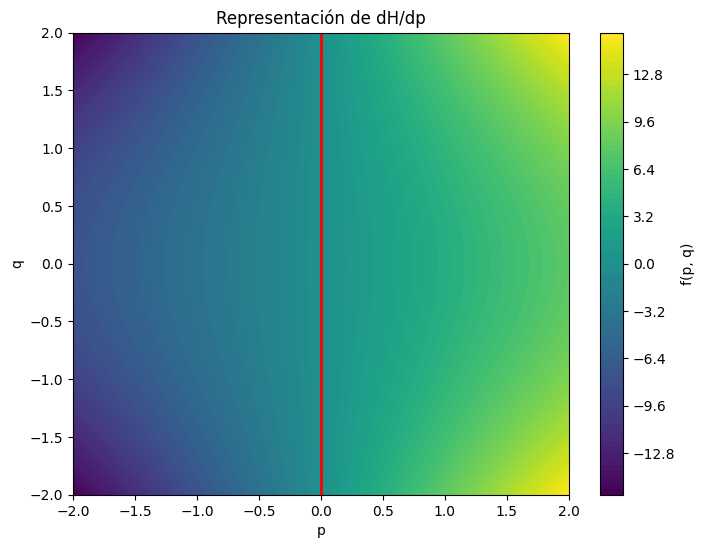

(-0.3162284851074219, 19, 7.629394531138978e-07)
(0.3162284851074219, 19, 7.629394531138978e-07)
(-7.62939453125e-07, 18, 7.62939453125e-07)


In [3]:
#Voy a plotear dH/dp y dH/dq:
from scipy.optimize import root_scalar

def plot_f_pq(f,name, p_range=(-2, 2), q_range=(-2, 2), grid_size=100):
    p = np.linspace(p_range[0], p_range[1], grid_size)
    q = np.linspace(q_range[0], q_range[1], grid_size)
    P, Q = np.meshgrid(p, q)
    F = f(P, Q)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(P, Q, F, levels=100, cmap='viridis')
    plt.colorbar(label='f(p, q)')
    plt.xlabel('p')
    plt.ylabel('q')
    plt.title(f'Representación de {name}')
    plt.contour(P, Q, F, levels=[0], colors='red', linewidths=2)
    plt.show()

h = 1.9
K = 0
N = 1500
J = N/2


plot_f_pq(lambda p, q: 2*q*(J*N**2*(p**2 + 2*q**2 - 4) + 2*K*q**2*(-p**2 - 2*q**2 + 4)*(p**2 + q**2 - 4) + N**3*h)/N**3,"dH/dq")
plot_f_pq(lambda p ,q: 2*p*(J*N**2*q**2- 2*K*q**4*(p**2 + q**2 - 4) + N**3*h)/N**3,"dH/dp")

def f(q):
    p=0
    return 2*q*(J*N**2*(p**2 + 2*q**2 - 4) + N**3*h)/N**3

def biseccion(f,x1,x2,eps,N_max):
    if np.sign(f(x1))!=np.sign(f(x2)):
        N=0
        while abs(x1-x2)>eps and N<N_max:
            N+=1
            xp=0.5*(x1+x2)
            if np.sign(f(xp))==np.sign(f(x1)):
                x1=xp
            else:
                x2=xp
        return xp,N,abs(x1-x2)
    else:
        print("No existe raiz o el intervalo es otro")
        return

print(biseccion(f,-0.5,-0.1,10**-6,1000))
print(biseccion(f,0.1,0.5,10**-6,1000))
print(biseccion(f,-0.1,0.1,10**-6,1000))

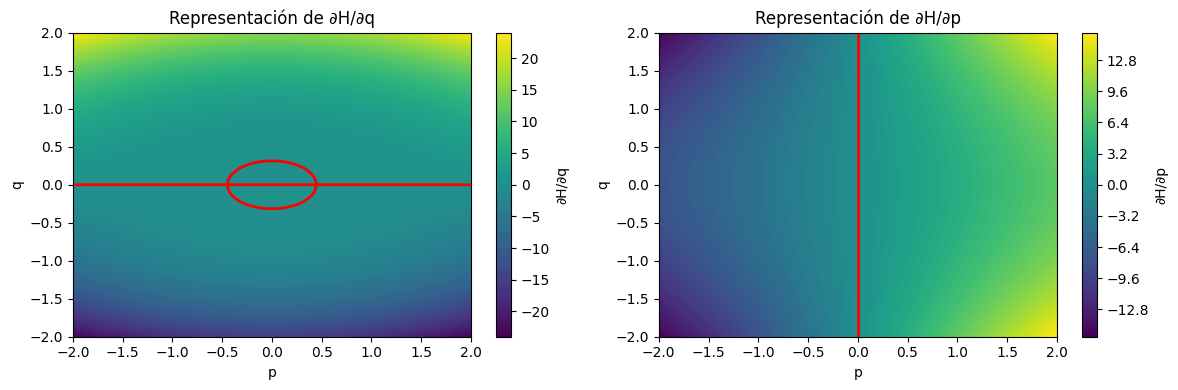

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_f_pq_side_by_side(f1, name1, f2, name2, p_range=(-2, 2), q_range=(-2, 2), grid_size=100):
    p = np.linspace(p_range[0], p_range[1], grid_size)
    q = np.linspace(q_range[0], q_range[1], grid_size)
    P, Q = np.meshgrid(p, q)
    
    F1 = f1(P, Q)
    F2 = f2(P, Q)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    # Primer gráfico
    c1 = axs[0].contourf(P, Q, F1, levels=100, cmap='viridis')
    axs[0].contour(P, Q, F1, levels=[0], colors='red', linewidths=2)
    axs[0].set_title(f"Representación de {name1}")
    axs[0].set_xlabel("p")
    axs[0].set_ylabel("q")
    fig.colorbar(c1, ax=axs[0], label='∂H/∂q')
    
    # Segundo gráfico
    c2 = axs[1].contourf(P, Q, F2, levels=100, cmap='viridis')
    axs[1].contour(P, Q, F2, levels=[0], colors='red', linewidths=2)
    axs[1].set_title(f"Representación de {name2}")
    axs[1].set_xlabel("p")
    axs[1].set_ylabel("q")
    fig.colorbar(c2, ax=axs[1], label='∂H/∂p')
    
    plt.tight_layout()
    plt.show()

# Parámetros
h = 1.9
K = 0
N = 1500
J = N / 2

# Llamada a la función
plot_f_pq_side_by_side(
    lambda p, q: 2*q*(J*N**2*(p**2 + 2*q**2 - 4) + 2*K*q**2*(-p**2 - 2*q**2 + 4)*(p**2 + q**2 - 4) + N**3*h)/N**3,
    "∂H/∂q",
    lambda p, q: 2*p*(J*N**2*q**2 - 2*K*q**4*(p**2 + q**2 - 4) + N**3*h)/N**3,
    "∂H/∂p"
)

Para sacar los puntos fijos aprovechamos que todos los puntos donde se anula $\frac{\partial H}{\partial p}$ es en la recta p=0, minimizando en una dimension H(p=0,q) y siendo los valores donde corta esta recta con los puntos donde se anula $\frac{\partial H}{\partial q}$. Para hacer más visuales y ver si estos puntos fijos son puntos de silla, máximos o mínimos representamos nuestro hamiltoniano H(p,q).

Mínimo encontrado en (p, q): [0. 0.]
Valor mínimo de H: -3.8


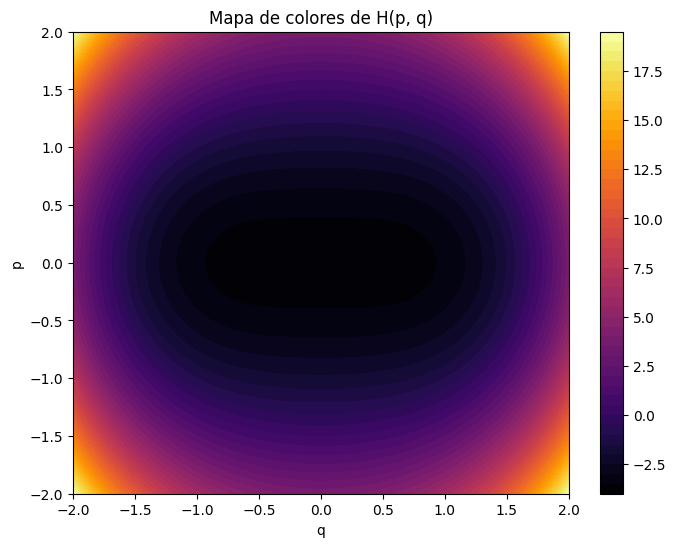

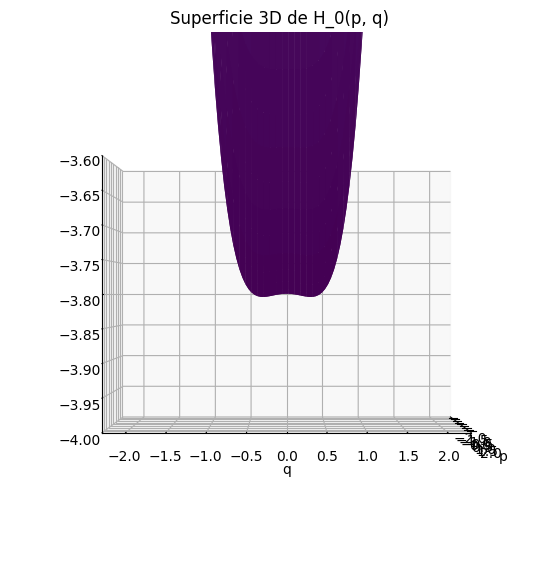

In [5]:
import numpy as np
from scipy.optimize import minimize

# Definir constantes
N = 1500
J = N/2
h = 1.9
K = 0*3*(N/2)**3


# Definir la función H(p, q)
def H(x):
    p, q = x  # Desempaquetamos p y q
    return -J*q**2*(-p**2 - q**2 + 4)/N - K*q**4*(-p**2 - q**2 + 4)**2/N**3 - 2*h*(-p**2/2 - q**2/2 + 1)

# Condiciones iniciales (p, q)
x0 = [0, 0]  # Puedes probar con otros valores iniciales

# Minimización de H(p, q)
resultado = minimize(H, x0, method='BFGS')

# Mostrar resultados
print("Mínimo encontrado en (p, q):", resultado.x)
print("Valor mínimo de H:", resultado.fun)

# Definir el rango de valores para P y Q
p_values = np.linspace(-2, 2, 500)  # Valores de P (eje y)
q_values = np.linspace(-2, 2, 500)  # Valores de Q (eje x)

# Crear la malla de valores de P y Q
P, Q = np.meshgrid(p_values, q_values)

def H(p,q):
    return -J*q**2*(-p**2 - q**2 + 4)/N - K*q**4*(-p**2 - q**2 + 4)**2/N**3 - 2*h*(-p**2/2 - q**2/2 + 1)

# Evaluar H en cada punto de la malla
H_values = H(P, Q)

# Crear la figura
plt.figure(figsize=(8, 6))
plt.contourf(Q, P, H_values, levels=50, cmap='inferno')  # Heatmap de colores
plt.colorbar()  # Barra de colores
plt.xlabel("q")
plt.ylabel("p")
plt.title("Mapa de colores de H(p, q)")
plt.show()

def plot_f_pq_3d(f, p_range=(-2, 2), q_range=(-2, 2), grid_size=100):
    p = np.linspace(p_range[0], p_range[1], grid_size)
    q = np.linspace(q_range[0], q_range[1], grid_size)
    P, Q = np.meshgrid(p, q)
    F = f(P, Q)
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(P, Q, F, cmap='viridis', edgecolor='none')
    ax.set_xlabel('p')
    ax.set_ylabel('q')
    #ax.set_zlabel('f(p, q)')
    ax.set_title('Superficie 3D de H_0(p, q)')
    ax.set_zlim(-4,-3.6)
    ax.view_init(elev=0, azim=0)
    
    plt.show()
plot_f_pq_3d(lambda p, q: -J*q**2*(-p**2 - q**2 + 4)/N - K*q**4*(-p**2 - q**2 + 4)**2/N**3 - 2*h*(-p**2/2 - q**2/2 + 1))


Los puntos fijos efectivamente coinciden con los dos minimos y un punto de silla  para el hamiltoniano inicial. Los dos mínimos se sitúan en los puntos (-0.3162284851074219,0) y (0,-0.3162284851074219) con energía E=-3.805, mientras que el punto de silla en (0,0), con energía E=-3.8. Esto daría lugar a un estado inicial ferromagnético (magnetización no nula).

A continuación, procedemos a evolucionar el sistema con el hamiltoniano final hf=5 y Kf=3. Para ello utilizaremos el método Runge-Kutta de cuarto orden con paso fijo. Es necesario escoger un paso lo suficientemente pequeño para que recoja la evolución real del sistema dada la alta velocidad de variación de q y p. (AÑADIR EN TFG IMÁGEN DE LAS TRAYECTORIAS EN FUNCIÓN DEL NÚMERO DE PUNTOS TEMPORALES QUE COJAS).

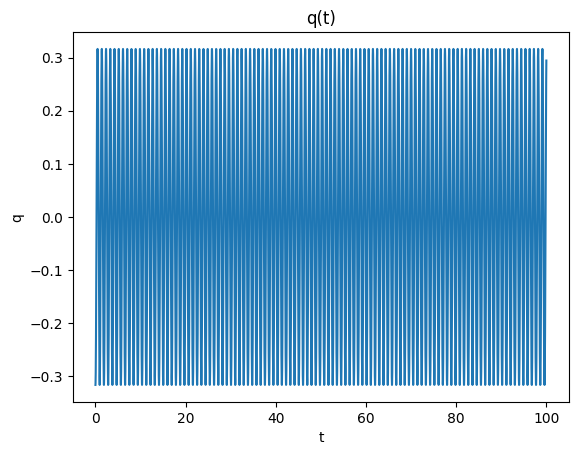

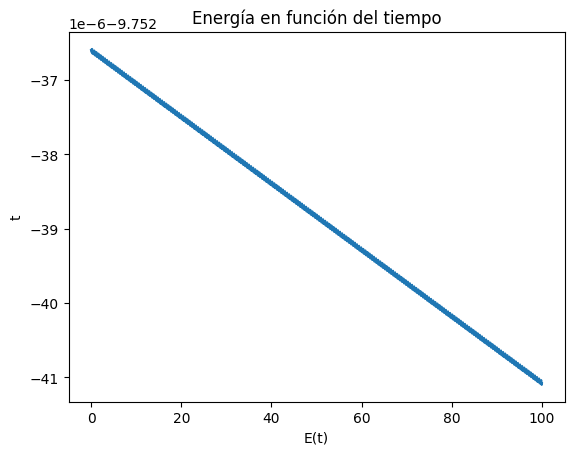

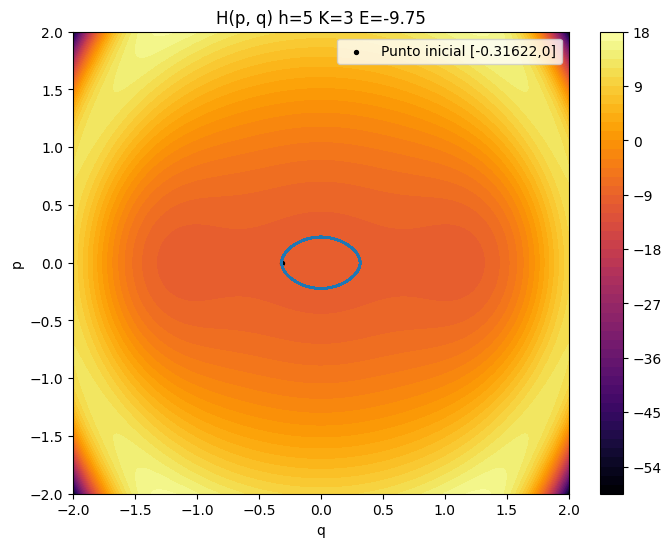

In [6]:
def H(p,q):
    N = 1500
    J = N/2
    h = 5
    K = 3*(N/2)**3
    return -J*q**2*(-p**2 - q**2 + 4)/N - K*q**4*(-p**2 - q**2 + 4)**2/N**3 - 2*h*(-p**2/2 - q**2/2 + 1)

def f(r,t):
    #Ahora usamos las variables finales para la evolucion temporal
    N = 1500
    J = N/2
    h = 5
    K = 3*(N/2)**3
    p=r[0]
    q=r[1]
    fp= -(2*q*(J*N**2*(p**2 + 2*q**2 - 4) + 2*K*q**2*(-p**2 - 2*q**2 + 4)*(p**2 + q**2 - 4) + N**3*h)/N**3)
    fq= 2*p*(J*N**2*q**2 - 2*K*q**4*(p**2 + q**2 - 4) + N**3*h)/N**3
    return np.array([fp,fq],float)


a=0 # punto inicial del intervalo
b=100 # punto final del intervalo
Np=10000 # número de puntos

hp=(b-a)/Np # tamaño del paso


tp=np.linspace(a,b,Np) # inicializamos nuestras soluciones para un array de puntos en t
pp=[]
qp=[]
r=np.array([0,-0.3162284851074219],float) # condiciones iniciales para nuestras soluciones

for t in tp:
    pp.append(r[0])
    qp.append(r[1])
    k1 = hp*f(r,t)
    k2 = hp*f(r+0.5*k1,t+0.5*hp)
    k3 = hp*f(r+0.5*k2,t+0.5*hp)
    k4 = hp*f(r+k3,t+hp)
    r += (k1+2*k2+2*k3+k4)/6
    

plt.plot(tp,qp)
plt.title("q(t)")
plt.xlabel("t")
plt.ylabel("q")
plt.xlabel("t")
plt.show()

def H(p,q):
    N = 1500
    J = N/2
    h = 5
    K = 3*(N/2)**3
    return -J*q**2*(-p**2 - q**2 + 4)/N - K*q**4*(-p**2 - q**2 + 4)**2/N**3 - 2*h*(-p**2/2 - q**2/2 + 1)

H=np.vectorize(H)
plt.plot(tp,H(np.array(pp),np.array(qp)))
plt.xlabel('E(t)')
plt.ylabel('t')
plt.title("Energía en función del tiempo")
plt.show()

# Definir el rango de valores para P y Q
p_values = np.linspace(-2, 2, 500)  # Valores de P (eje y)
q_values = np.linspace(-2, 2, 500)  # Valores de Q (eje x)

# Crear la malla de valores de P y Q
P, Q = np.meshgrid(p_values, q_values)

# Evaluar H en cada punto de la malla
H_values = H(P, Q)

# Crear la figura
plt.figure(figsize=(8, 6))
plt.contourf(Q, P, H_values, levels=50, cmap='inferno')  # Heatmap de colores
plt.colorbar()  # Barra de colores
plt.xlabel("q")
plt.ylabel("p")
plt.title("H(p, q) h=5 K=3 E=-9.75")
plt.plot(np.array(qp),np.array(pp))
plt.scatter(-0.3162284851074219,0,color="black",s=8,label="Punto inicial [-0.31622,0]")
plt.legend()
plt.show()


Vamos ahora a probar a ver que ocurre con otro hamiltoniano inicial h=2.4, K=0.8:

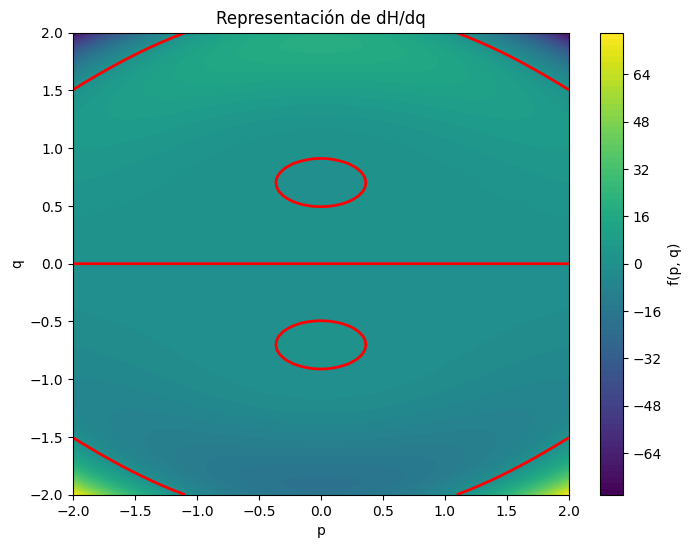

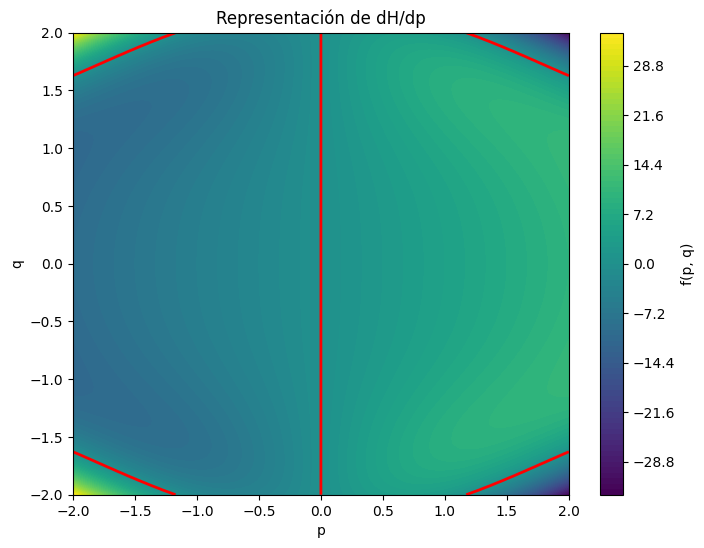

(0.9118177413940428, 20, 5.722045898215455e-07)
(0.49421768188476567, 19, 7.629394531138978e-07)
(-7.62939453125e-07, 18, 7.62939453125e-07)


In [26]:
#Voy a plotear dH/dp y dH/dq:
from scipy.optimize import root_scalar

def plot_f_pq(f,name, p_range=(-2, 2), q_range=(-2, 2), grid_size=100):
    p = np.linspace(p_range[0], p_range[1], grid_size)
    q = np.linspace(q_range[0], q_range[1], grid_size)
    P, Q = np.meshgrid(p, q)
    F = f(P, Q)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(P, Q, F, levels=100, cmap='viridis')
    plt.colorbar(label='f(p, q)')
    plt.xlabel('p')
    plt.ylabel('q')
    plt.title(f'Representación de {name}')
    plt.contour(P, Q, F, levels=[0], colors='red', linewidths=2)
    plt.show()

h = 2.4
K = 0.8*(N/2)**3
N = 1500
J = N/2


plot_f_pq(lambda p, q: 2*q*(J*N**2*(p**2 + 2*q**2 - 4) + 2*K*q**2*(-p**2 - 2*q**2 + 4)*(p**2 + q**2 - 4) + N**3*h)/N**3,"dH/dq")
plot_f_pq(lambda p ,q: 2*p*(J*N**2*q**2- 2*K*q**4*(p**2 + q**2 - 4) + N**3*h)/N**3,"dH/dp")

def f(q):
    p=0
    return 2*q*(J*N**2*(p**2 + 2*q**2 - 4) + 2*K*q**2*(-p**2 - 2*q**2 + 4)*(p**2 + q**2 - 4) + N**3*h)/N**3

def biseccion(f,x1,x2,eps,N_max):
    if np.sign(f(x1))!=np.sign(f(x2)):
        N=0
        while abs(x1-x2)>eps and N<N_max:
            N+=1
            xp=0.5*(x1+x2)
            if np.sign(f(xp))==np.sign(f(x1)):
                x1=xp
            else:
                x2=xp
        return xp,N,abs(x1-x2)
    else:
        print("No existe raiz o el intervalo es otro")
        return

print(biseccion(f,0.6,1.2,10**-6,1000))
print(biseccion(f,0.1,0.5,10**-6,1000))
print(biseccion(f,-0.1,0.1,10**-6,1000))

Mínimo encontrado en (p, q): [-1.29306150e-09  9.11817818e-01]
Valor mínimo de H: -4.81581967833489


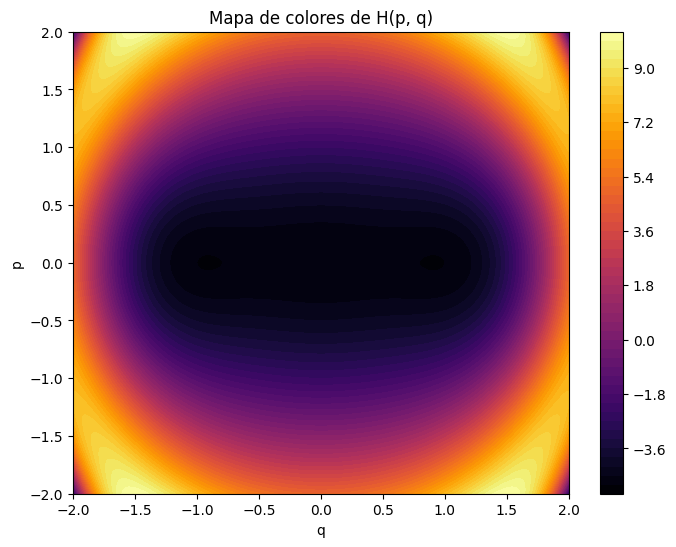

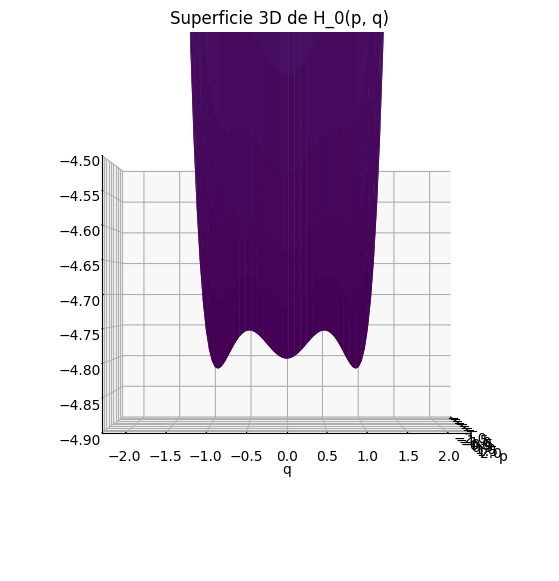

In [28]:
import numpy as np
from scipy.optimize import minimize

# Definir constantes
N = 1500
J = N/2
h = 2.4
K = 0.8*(N/2)**3


# Definir la función H(p, q)
def H(x):
    p, q = x  # Desempaquetamos p y q
    return -J*q**2*(-p**2 - q**2 + 4)/N - K*q**4*(-p**2 - q**2 + 4)**2/N**3 - 2*h*(-p**2/2 - q**2/2 + 1)

# Condiciones iniciales (p, q)
x0 = [0, 0.5]  # Puedes probar con otros valores iniciales

# Minimización de H(p, q)
resultado = minimize(H, x0, method='BFGS')

# Mostrar resultados
print("Mínimo encontrado en (p, q):", resultado.x)
print("Valor mínimo de H:", resultado.fun)

# Definir el rango de valores para P y Q
p_values = np.linspace(-2, 2, 500)  # Valores de P (eje y)
q_values = np.linspace(-2, 2, 500)  # Valores de Q (eje x)

# Crear la malla de valores de P y Q
P, Q = np.meshgrid(p_values, q_values)

def H(p,q):
    return -J*q**2*(-p**2 - q**2 + 4)/N - K*q**4*(-p**2 - q**2 + 4)**2/N**3 - 2*h*(-p**2/2 - q**2/2 + 1)

# Evaluar H en cada punto de la malla
H_values = H(P, Q)

# Crear la figura
plt.figure(figsize=(8, 6))
plt.contourf(Q, P, H_values, levels=50, cmap='inferno')  # Heatmap de colores
plt.colorbar()  # Barra de colores
plt.xlabel("q")
plt.ylabel("p")
plt.title("Mapa de colores de H(p, q)")
plt.show()

def plot_f_pq_3d(f, p_range=(-2, 2), q_range=(-2, 2), grid_size=100):
    p = np.linspace(p_range[0], p_range[1], grid_size)
    q = np.linspace(q_range[0], q_range[1], grid_size)
    P, Q = np.meshgrid(p, q)
    F = f(P, Q)
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(P, Q, F, cmap='viridis', edgecolor='none')
    ax.set_xlabel('p')
    ax.set_ylabel('q')
    #ax.set_zlabel('f(p, q)')
    ax.set_title('Superficie 3D de H_0(p, q)')
    ax.set_zlim(-4.9,-4.5)
    ax.view_init(elev=0, azim=0)
    plt.show()
plot_f_pq_3d(lambda p, q: -J*q**2*(-p**2 - q**2 + 4)/N - K*q**4*(-p**2 - q**2 + 4)**2/N**3 - 2*h*(-p**2/2 - q**2/2 + 1))

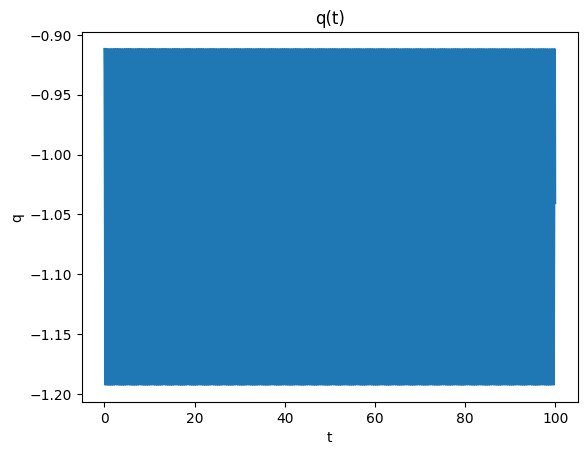

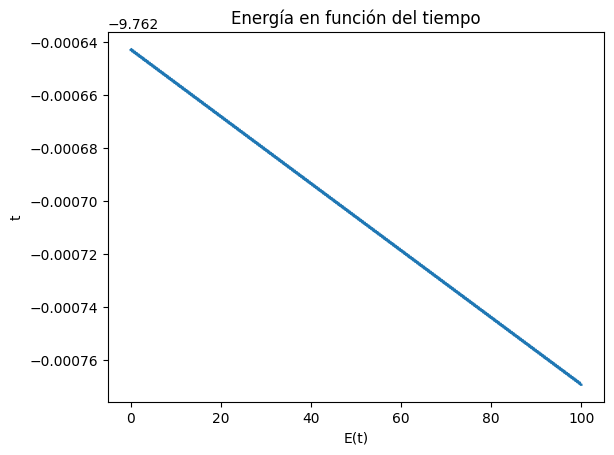

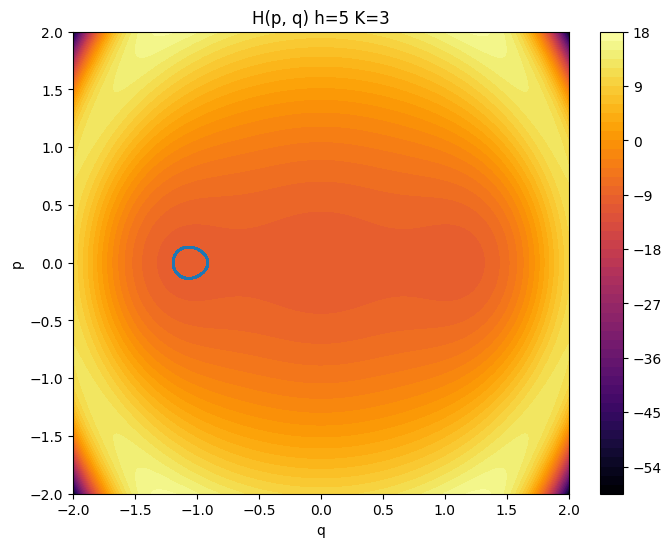

In [30]:
def H(p,q):
    N = 1500
    J = N/2
    h = 5
    K = 3*(N/2)**3
    return -J*q**2*(-p**2 - q**2 + 4)/N - K*q**4*(-p**2 - q**2 + 4)**2/N**3 - 2*h*(-p**2/2 - q**2/2 + 1)

def f(r,t):
    #Ahora usamos las variables finales para la evolucion temporal
    N = 1500
    J = N/2
    h = 5
    K = 3*(N/2)**3
    p=r[0]
    q=r[1]
    fp= -(2*q*(J*N**2*(p**2 + 2*q**2 - 4) + 2*K*q**2*(-p**2 - 2*q**2 + 4)*(p**2 + q**2 - 4) + N**3*h)/N**3)
    fq= 2*p*(J*N**2*q**2 - 2*K*q**4*(p**2 + q**2 - 4) + N**3*h)/N**3
    return np.array([fp,fq],float)


a=0 # punto inicial del intervalo
b=100 # punto final del intervalo
Np=15000 # número de puntos

hp=(b-a)/Np # tamaño del paso


tp=np.linspace(a,b,Np) # inicializamos nuestras soluciones para un array de puntos en t
pp=[]
qp=[]
r=np.array([0,-0.9118],float) # condiciones iniciales para nuestras soluciones



for t in tp:
    pp.append(r[0])
    qp.append(r[1])
    k1 = hp*f(r,t)
    k2 = hp*f(r+0.5*k1,t+0.5*hp)
    k3 = hp*f(r+0.5*k2,t+0.5*hp)
    k4 = hp*f(r+k3,t+hp)
    r += (k1+2*k2+2*k3+k4)/6
    

plt.plot(tp,qp)
plt.title("q(t)")
plt.xlabel("t")
plt.ylabel("q")
plt.xlabel("t")
plt.show()

def H(p,q):
    N = 1500
    J = N/2
    h = 5
    K = 3*(N/2)**3
    return -J*q**2*(-p**2 - q**2 + 4)/N - K*q**4*(-p**2 - q**2 + 4)**2/N**3 - 2*h*(-p**2/2 - q**2/2 + 1)

H=np.vectorize(H)
plt.plot(tp,H(np.array(pp),np.array(qp)))
plt.xlabel('E(t)')
plt.ylabel('t')
plt.title("Energía en función del tiempo")
plt.show()

# Definir el rango de valores para P y Q
p_values = np.linspace(-2, 2, 500)  # Valores de P (eje y)
q_values = np.linspace(-2, 2, 500)  # Valores de Q (eje x)

# Crear la malla de valores de P y Q
P, Q = np.meshgrid(p_values, q_values)

# Evaluar H en cada punto de la malla
H_values = H(P, Q)

# Crear la figura 
plt.figure(figsize=(8, 6))
plt.contourf(Q, P, H_values, levels=50, cmap='inferno')  # Heatmap de colores
plt.colorbar()  # Barra de colores
plt.xlabel("q")
plt.ylabel("p")
plt.title("H(p, q) h=5 K=3")
plt.plot(np.array(qp),np.array(pp))
plt.show()